## Activity 7 - Classifying Pokemon with transfer learning using VGG16

In this activity, we will learn:<br>
* Custom Dataset - Pokemon
* Load and preprocess the dataset
* Split the dataset for training and testing
* Use a pretrained VGG16 model as a feature extractor
* Add our customer classify layer
* Evaluate the model

we will a pre-trained VGG16 model as a feature extractor and re-trained to classify the 5 characters in our Pokemon dataset.


### Mount Google Drive


Mount your Google Drive on your runtime using an authorization code.  

Follow the instruction on the screen to authorise Colab accessing your drive.  On your Google Drive, you can access you files prepend with “/content/drive/MyDrive/”


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import libraries and dataset

In [ ]:
import os
import cv2
import numpy as np
import keras
import numpy as np
import random
from imutils import paths
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from keras.applications import vgg16
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers

dataset_path = "/content/drive/MyDrive/DATASETS/flowers5_mini"
IMAGE_DIMS = (224, 224, 3)
BS = 32
EPOCHS=100
print("keras version %s"%keras.__version__)
print("opencv version %s"%cv2.__version__)

# initialize the data and labels
data = []
labels = []

keras version 2.4.3
opencv version 4.1.2


Read and format our images and labels in to numpy array

In [ ]:
# grab the image paths and randomly shuffle them
print("[INFO] loading images...")
imagePaths = sorted(list(paths.list_images(dataset_path)))
random.seed(42)
random.shuffle(imagePaths)
# loop over the input images
for ind, imagePath in enumerate(imagePaths):
	# load the image, pre-process it, and store it in the data list
	print(ind, imagePath, imagePath.split(os.path.sep)[-2])
	image = cv2.imread(imagePath)
	image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
	image = img_to_array(image)
	data.append(image)
 
	# extract the class label from the image path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

[INFO] loading images...
0 /content/drive/MyDrive/DATASETS/flowers5_mini/dandelion/478851599_25bfd70605_n.jpg dandelion
1 /content/drive/MyDrive/DATASETS/flowers5_mini/sunflower/40410963_3ac280f23a_n.jpg sunflower
2 /content/drive/MyDrive/DATASETS/flowers5_mini/daisy/2019064575_7656b9340f_m.jpg daisy
3 /content/drive/MyDrive/DATASETS/flowers5_mini/dandelion/458011386_ec89115a19.jpg dandelion
4 /content/drive/MyDrive/DATASETS/flowers5_mini/daisy/301964511_fab84ea1c1.jpg daisy
5 /content/drive/MyDrive/DATASETS/flowers5_mini/daisy/512177035_70afc925c8.jpg daisy
6 /content/drive/MyDrive/DATASETS/flowers5_mini/sunflower/1379256773_bb2eb0d95b_n.jpg sunflower
7 /content/drive/MyDrive/DATASETS/flowers5_mini/rose/1446097778_97149b8362.jpg rose
8 /content/drive/MyDrive/DATASETS/flowers5_mini/daisy/515112668_a49c69455a.jpg daisy
9 /content/drive/MyDrive/DATASETS/flowers5_mini/sunflower/184682506_8a9b8c662d.jpg sunflower
10 /content/drive/MyDrive/DATASETS/flowers5_mini/tulip/110147301_ad921e2828.j

### Pre-process dataset

We will also rescale the image to 224 by 244 (this is the dimension used for the activity, so we just want to be consistent to make comparison). We will also normalize the pixel value to [0,1].

In [ ]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print("[INFO] data matrix: {:.2f}MB".format(
	data.nbytes / (1024 * 1000.0)))

[INFO] data matrix: 588.00MB


Next, binarize our labels using scikit-learn’s **LabelBinarizer()**.  The following compares the difference between One-Hot and LabelBinarizer

In [ ]:
# binarize the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

Next, we will split our dataset into train set and test set

In [ ]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.2, random_state=42)

### Create the pre-trained model


Create our model based on VGG16.  

We will replace the top layer with our customised Dense layer that has only 5 nodes.

Note that we will also set the layers as not trainable.  We are using these pre-trained layers for features extraction. 

Type the following block of code in the next code block to create the network.

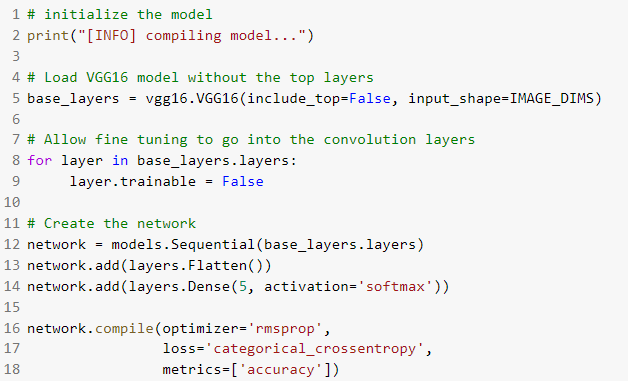

In [ ]:
#
#[ENTER YOUR CODE HERE]
#

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

### Train & evaluation the network 

We can now proceed to train and evaluate the model with our training dataset and evaluate with our test dataset to get a feel of the accuracy

Type the following block of code in the next code block to create the network.

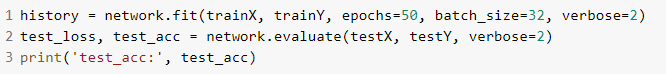

In [ ]:
#
#[ENTER YOUR CODE HERE]
#

### Make a prediction

 Load an image for testing

In [ ]:
# load the image
image = cv2.imread(dataset_path + '/daisy/5547758_eea9edfd54_n.jpg')
# pre-process the image for classification
image = cv2.resize(image, (IMAGE_DIMS[0], IMAGE_DIMS[1]))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [ ]:
# classify the input image
print("[INFO] classifying image...")
proba = network.predict(image)[0]
idx = np.argmax(proba)
label = lb.classes_[idx]

print(label)

[INFO] classifying image...
daisy


### Exercise

(1) Make a prediction using another image of a flower
(2) Scrape the web for another species and retain your models.